# Timeline Analysis

1.Create a storyboard showing spread of Covid 19 cases in your country or any region (Asia, Europe, BRICS etc)

2.Use animation, timeline and annotations to create attractive and interactive dashboards and story

3.Identify interesting patterns and possible reasons helping Covid 19 spread with basic as well as advanced charts

### Importing libraries and Understand the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Read the Data

In [2]:
data = pd.read_csv('C:/Users/Hinal/Desktop/Dataset/owid-covid-data.csv')

In [3]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,DZA,Africa,Algeria,22-03-2020,201.0,62.0,21.857,17.0,2.0,1.857,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.9,76.88,0.748
1,DZA,Africa,Algeria,23-03-2020,230.0,29.0,25.143,17.0,0.0,1.857,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.9,76.88,0.748
2,DZA,Africa,Algeria,24-03-2020,264.0,34.0,29.143,19.0,2.0,2.143,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.9,76.88,0.748
3,DZA,Africa,Algeria,25-03-2020,302.0,38.0,32.571,21.0,2.0,2.000,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.9,76.88,0.748
4,DZA,Africa,Algeria,26-03-2020,367.0,65.0,40.000,25.0,4.0,2.286,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.9,76.88,0.748


In [4]:
data.shape

(19414, 59)

In [5]:
data.dtypes

iso_code                                  object
continent                                 object
location                                  object
date                                      object
total_cases                              float64
new_cases                                float64
new_cases_smoothed                       float64
total_deaths                             float64
new_deaths                               float64
new_deaths_smoothed                      float64
total_cases_per_million                  float64
new_cases_per_million                    float64
new_cases_smoothed_per_million           float64
total_deaths_per_million                 float64
new_deaths_per_million                   float64
new_deaths_smoothed_per_million          float64
reproduction_rate                        float64
icu_patients                             float64
icu_patients_per_million                 float64
hosp_patients                            float64
hosp_patients_per_mi

### Summary of Data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19414 entries, 0 to 19413
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               19414 non-null  object 
 1   continent                              18869 non-null  object 
 2   location                               19414 non-null  object 
 3   date                                   19414 non-null  object 
 4   total_cases                            19137 non-null  float64
 5   new_cases                              19136 non-null  float64
 6   new_cases_smoothed                     19125 non-null  float64
 7   total_deaths                           18545 non-null  float64
 8   new_deaths                             18545 non-null  float64
 9   new_deaths_smoothed                    19125 non-null  float64
 10  total_cases_per_million                18729 non-null  float64
 11  ne

In [7]:
data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,1.913700e+04,19136.000000,19125.000000,18545.000000,18545.000000,19125.000000,18729.000000,18728.000000,18717.000000,18137.000000,...,17498.000000,12706.000000,18201.000000,18013.000000,14904.000000,14335.000000,10076.000000,15751.000000,18815.000000,18200.000000
mean,4.218642e+05,3960.843332,3906.275088,11882.736263,82.645080,79.084016,9217.328817,65.852179,65.362143,200.365360,...,18998.471043,14.630655,256.984879,7.365050,10.655770,31.003348,54.512651,2.962379,73.350797,0.726900
std,1.909182e+06,19310.787571,18635.238663,46992.029050,366.822845,340.567185,18449.101565,142.459786,125.264180,370.661421,...,19299.646235,20.298403,134.151919,3.566386,10.056141,12.168619,31.848633,2.487884,7.560079,0.154476
min,1.000000e+00,-46076.000000,-173.286000,1.000000,-443.000000,-63.000000,0.023000,-2153.437000,-276.825000,0.008000,...,752.788000,0.100000,79.370000,0.990000,0.200000,7.700000,1.188000,0.200000,54.690000,0.433000
25%,1.829000e+03,5.000000,9.571000,35.000000,0.000000,0.143000,280.974000,0.902000,1.613000,5.271000,...,3597.633000,0.700000,152.783000,4.970000,1.900000,21.600000,20.859000,1.300000,67.880000,0.601000
50%,1.086300e+04,86.000000,96.000000,264.000000,1.000000,1.286000,1512.731000,9.368000,11.109000,31.591000,...,12294.876000,2.500000,232.347000,7.110000,6.900000,30.000000,55.182000,2.300000,74.470000,0.740000
75%,1.059160e+05,806.250000,810.571000,2167.000000,14.000000,13.857000,8417.249000,61.869250,67.059000,192.387000,...,28763.071000,21.200000,336.717000,9.190000,19.100000,38.000000,87.847000,4.000000,78.860000,0.864000
max,2.745745e+07,360927.000000,340140.429000,585182.000000,6103.000000,4691.571000,149095.409000,2622.429000,1140.885000,2651.895000,...,94277.965000,77.600000,724.417000,18.680000,37.700000,78.100000,98.999000,13.800000,86.750000,0.957000


### Total Missing Values

In [8]:
# Total missing values in every column
total_missing = data.isnull().sum()

# Calculate percentage
percentge = total_missing/data.isnull().count()

# Combine total and percentage values
NAs = pd.concat([total_missing,percentge],axis=1,keys=('Total','Percentge'))

# Getting columns where there are missing values
NAs[NAs.Total>0].sort_values(by='Total',ascending=False)

,Total,Percentge
weekly_icu_admissions_per_million,19065,0.982023
weekly_icu_admissions,19065,0.982023
weekly_hosp_admissions,18980,0.977645
weekly_hosp_admissions_per_million,18980,0.977645
people_fully_vaccinated_per_hundred,17755,0.914546
people_fully_vaccinated,17755,0.914546
icu_patients,17430,0.897806
icu_patients_per_million,17430,0.897806
new_vaccinations,17380,0.895230
people_vaccinated_per_hundred,17195,0.885701


### Data Visualization

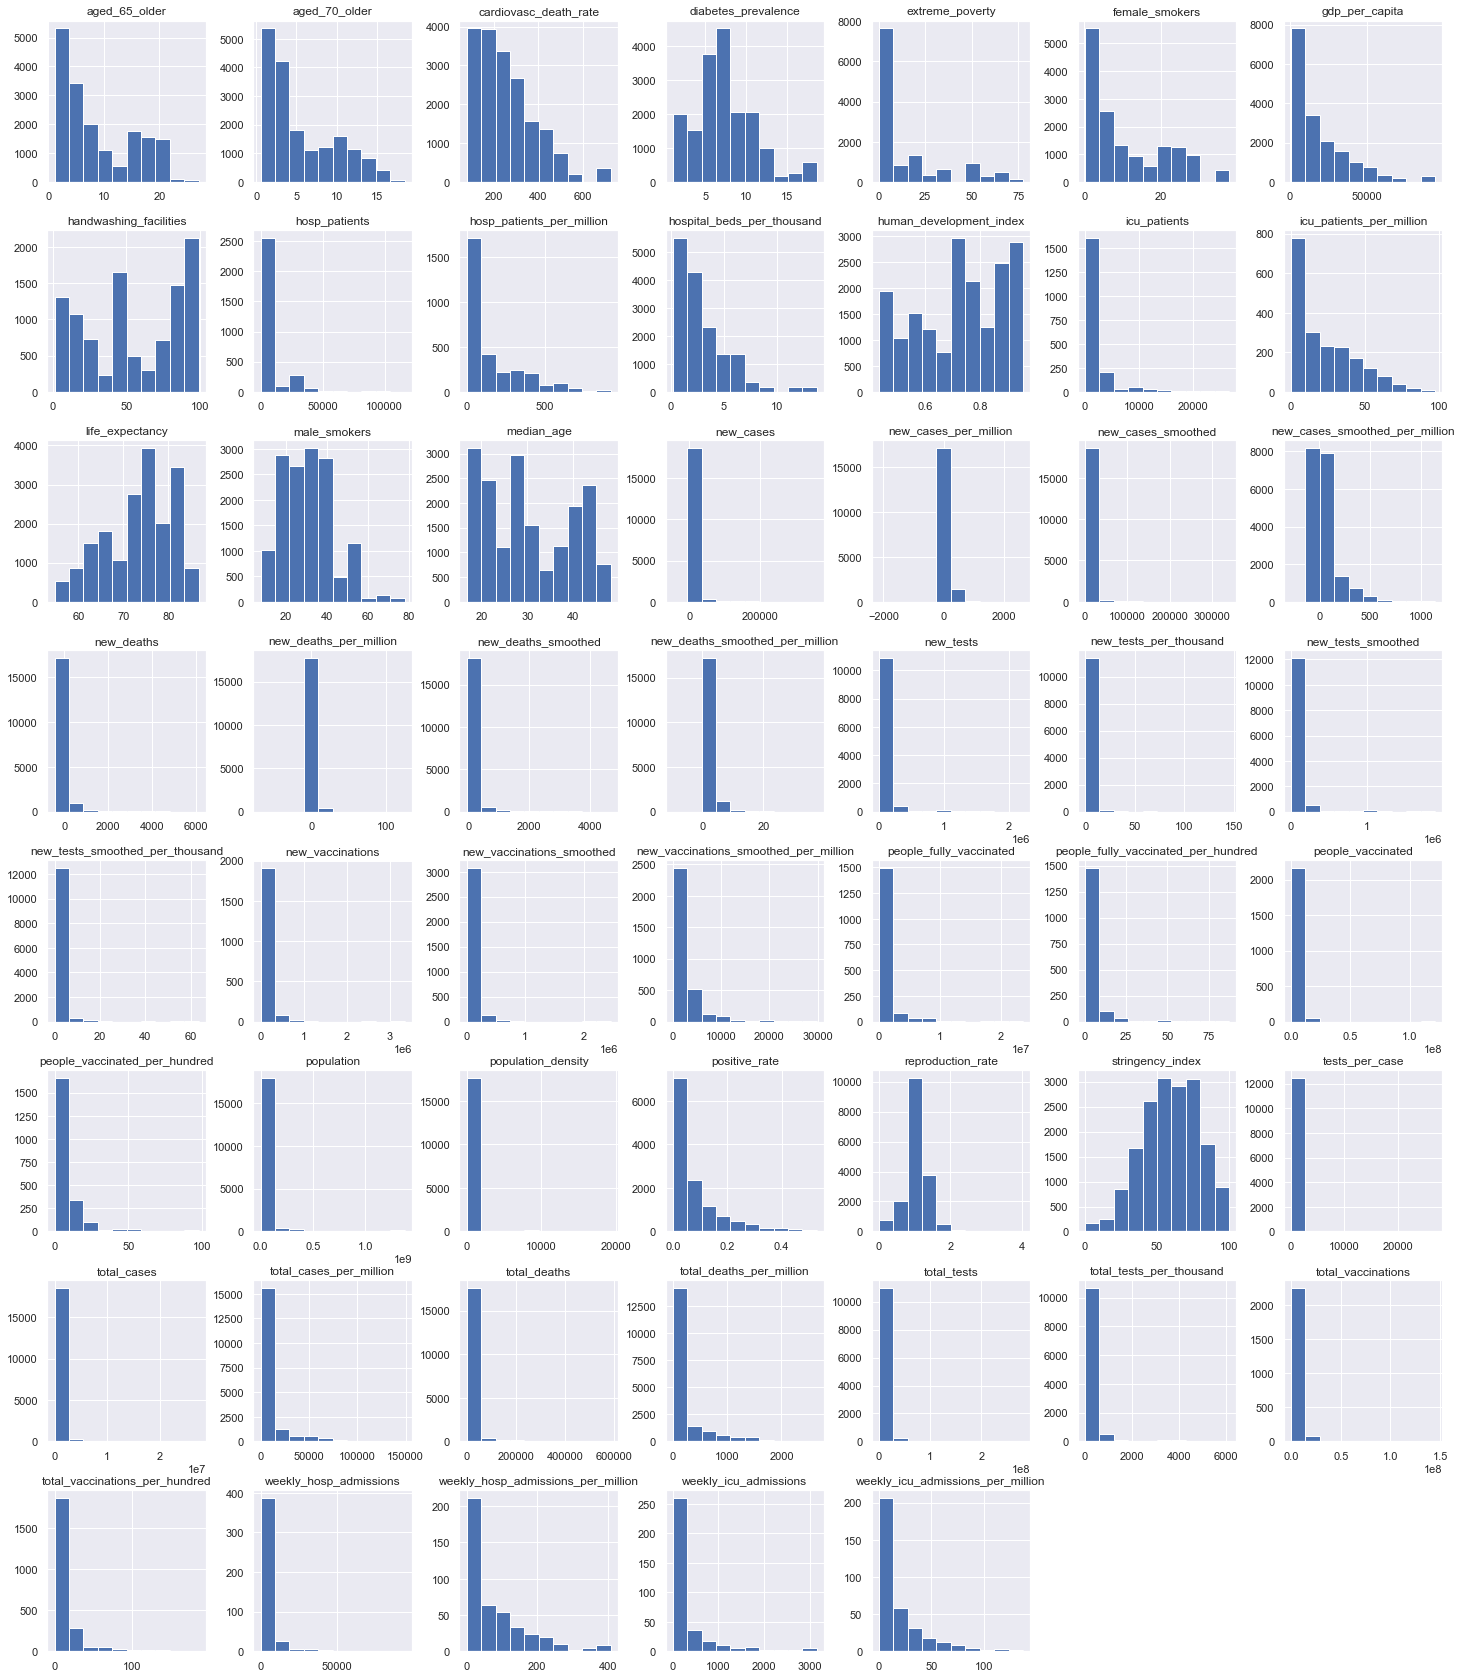

In [9]:
data.hist(figsize=(25,30))
plt.show()

### Handling Missing value

In [10]:
# dropping all the rows where all the entries are missing

data.dropna(how='all')

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,DZA,Africa,Algeria,22-03-2020,201.0,62.0,21.857,17.0,2.0,1.857,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.9,76.88,0.748
1,DZA,Africa,Algeria,23-03-2020,230.0,29.0,25.143,17.0,0.0,1.857,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.9,76.88,0.748
2,DZA,Africa,Algeria,24-03-2020,264.0,34.0,29.143,19.0,2.0,2.143,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.9,76.88,0.748
3,DZA,Africa,Algeria,25-03-2020,302.0,38.0,32.571,21.0,2.0,2.000,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.9,76.88,0.748
4,DZA,Africa,Algeria,26-03-2020,367.0,65.0,40.000,25.0,4.0,2.286,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.9,76.88,0.748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19409,ZWE,Africa,Zimbabwe,20-04-2021,37875.0,16.0,77.857,1554.0,1.0,1.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
19410,ZWE,Africa,Zimbabwe,21-04-2021,37980.0,105.0,87.286,1555.0,1.0,1.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
19411,ZWE,Africa,Zimbabwe,22-04-2021,38018.0,38.0,85.143,1555.0,0.0,0.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
19412,ZWE,Africa,Zimbabwe,23-04-2021,38045.0,27.0,73.000,1556.0,1.0,0.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [11]:
# filling all the missing values in a dataframe with 0

# data.fillna(0)

In [12]:
data['total_cases'].fillna(data['total_cases'].mean(),inplace=True)

In [13]:
data['new_cases'].fillna(data['new_cases'].mean(),inplace=True)

In [14]:
data['total_deaths'].fillna(data['total_deaths'].mean(),inplace=True)

In [15]:
data['new_deaths'].fillna(data['new_deaths'].mean(),inplace=True)

In [16]:
data['total_tests'].fillna(data['total_tests'].mean(),inplace=True)

In [17]:
data['new_tests'].fillna(data['new_tests'].mean(),inplace=True)

In [18]:
#create a new dataset by copying the original
covid_data = data[['date', 'total_cases', 'new_cases', 'total_deaths','new_deaths','total_tests','new_tests']]

In [19]:
covid_data.head()

,date,total_cases,new_cases,total_deaths,new_deaths,total_tests,new_tests
0,22-03-2020,201.0,62.0,17.0,2.0,5.065894e+06,55279.920355
1,23-03-2020,230.0,29.0,17.0,0.0,5.065894e+06,55279.920355
2,24-03-2020,264.0,34.0,19.0,2.0,5.065894e+06,55279.920355
3,25-03-2020,302.0,38.0,21.0,2.0,5.065894e+06,55279.920355
4,26-03-2020,367.0,65.0,25.0,4.0,5.065894e+06,55279.920355


In [20]:
# change format of date to the format used
covid_data['date']=pd.to_datetime(covid_data['date'], infer_datetime_format=True)

In [21]:
covid_data.set_index('date',inplace=True)

Text(0.5, 0, 'Month')

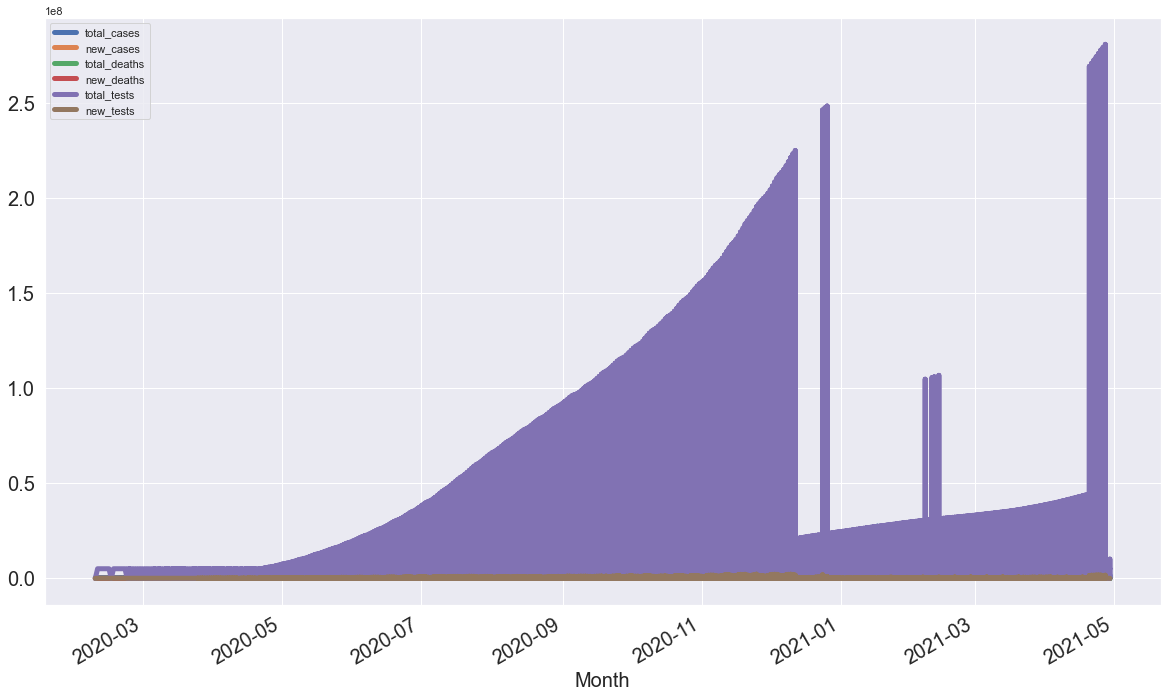

In [22]:
# ploting the data we created.
covid_data.plot(figsize=(20,12),linewidth=5,fontsize=20)
plt.xlabel('Month', fontsize=20)

Text(0.5, 0, 'Month')

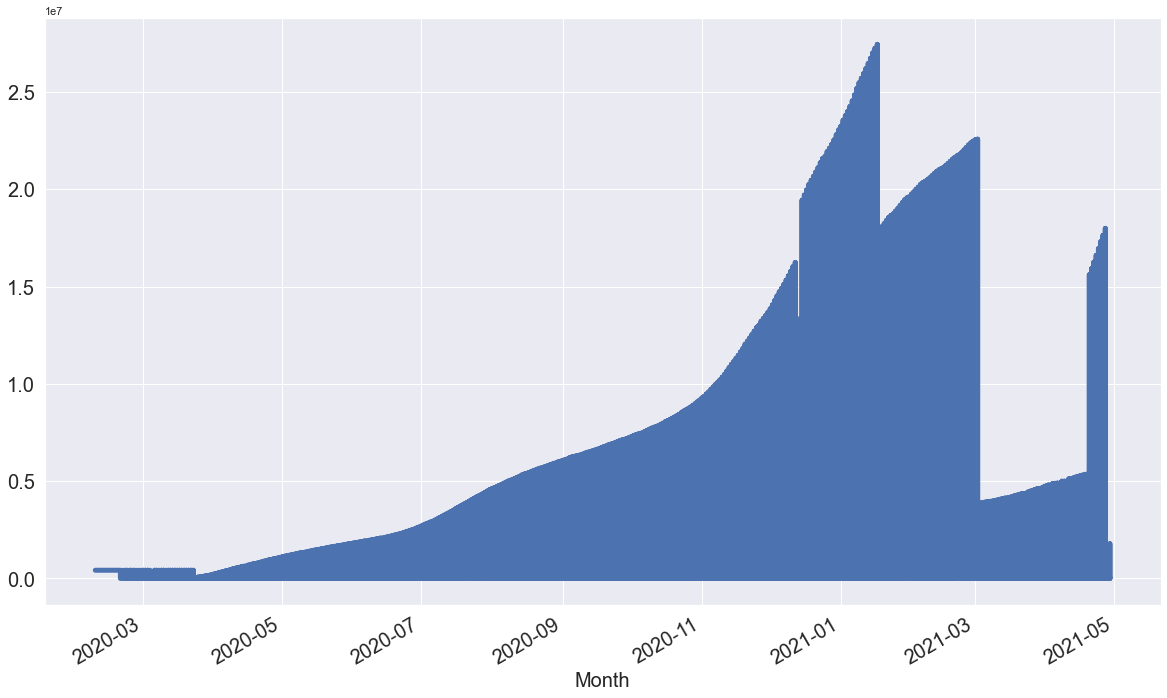

In [23]:
# ploting data of total cases
covid_data.total_cases.plot(figsize=(20,12),linewidth=5,fontsize=20)
plt.xlabel('Month', fontsize=20)

Text(0.5, 0, 'Month')

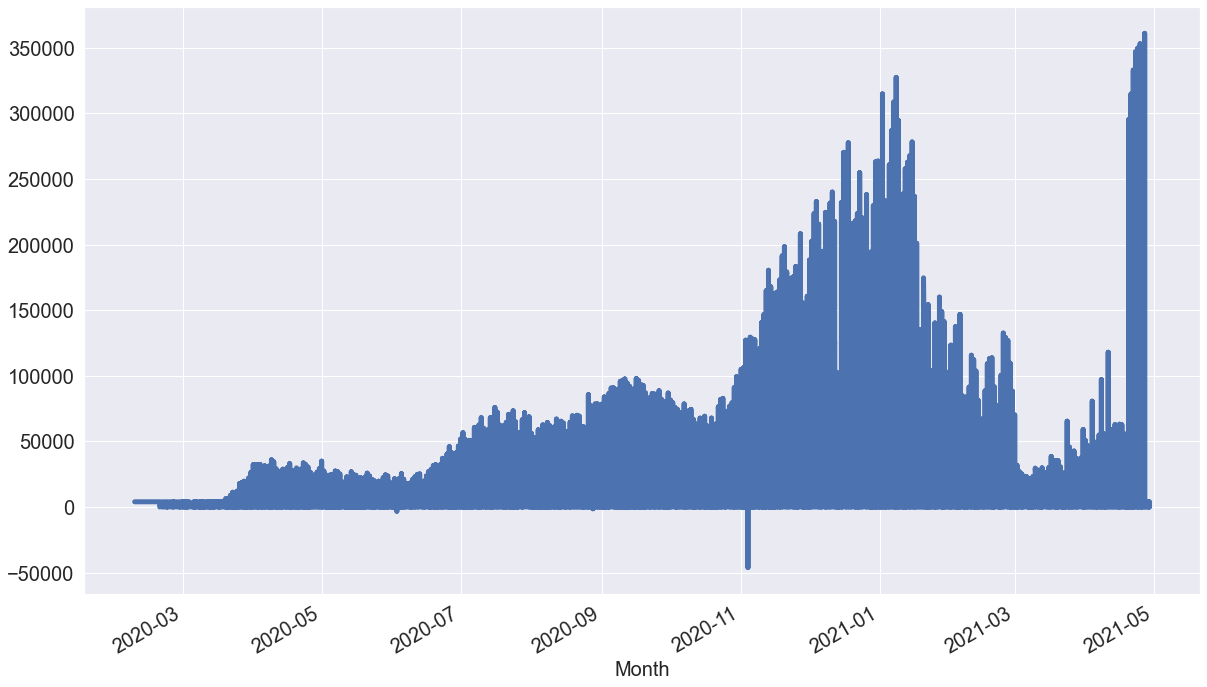

In [24]:
# ploting data of new cases
covid_data.new_cases.plot(figsize=(20,12),linewidth=5,fontsize=20)
plt.xlabel('Month', fontsize=20)

Text(0.5, 0, 'Month')

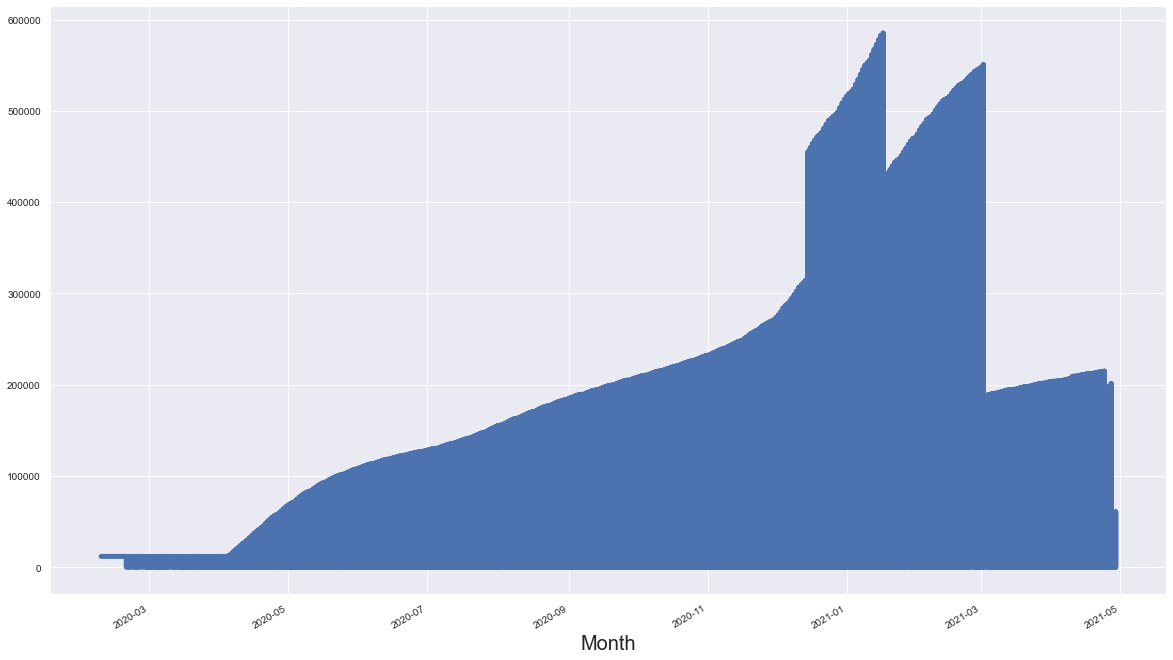

In [25]:
# ploting data of total deaths
covid_data.total_deaths.plot(figsize=(20,12),linewidth=5,fontsize=10)
plt.xlabel('Month', fontsize=20)

Text(0.5, 0, 'Month')

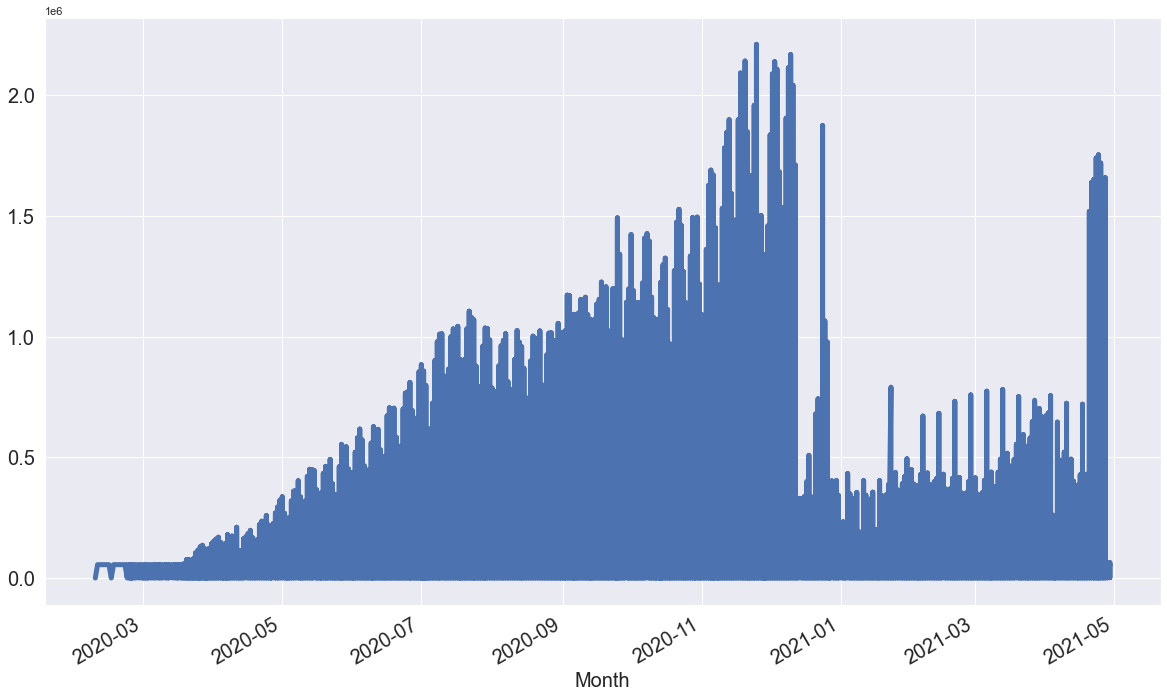

In [26]:
# ploting data of new tests
covid_data.new_tests.plot(figsize=(20,12),linewidth=5,fontsize=20)
plt.xlabel('Month', fontsize=20)

Text(0.5, 0, 'Month')

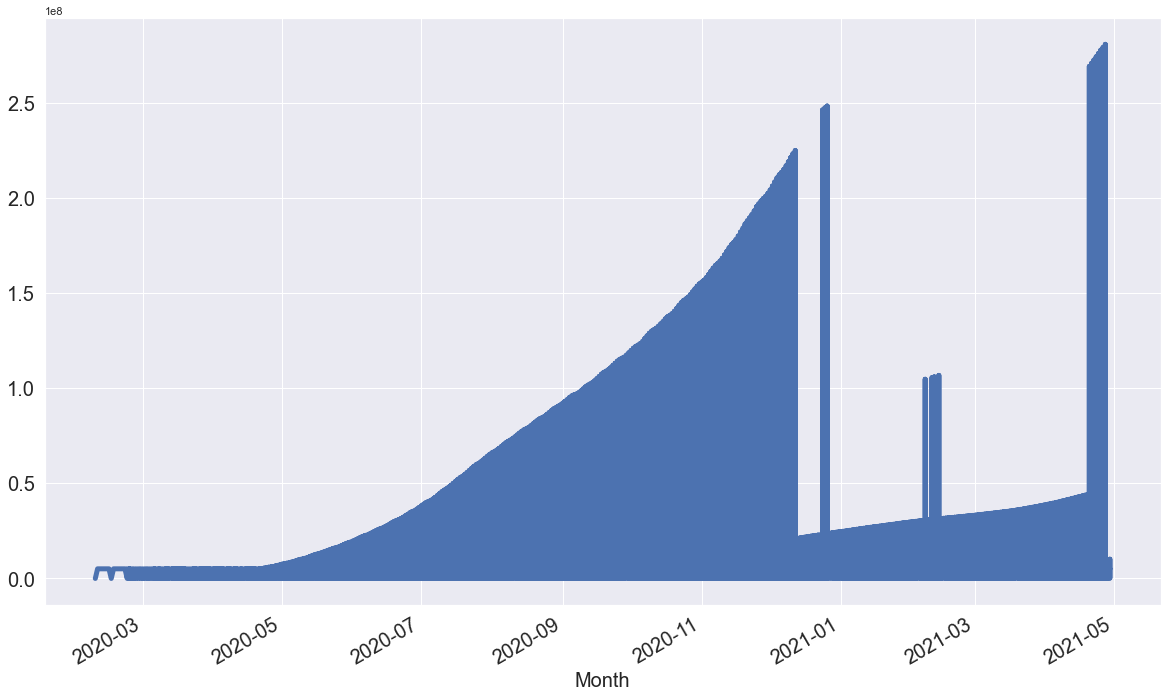

In [27]:
# ploting data of total tests done
covid_data.total_tests.plot(figsize=(20,12),linewidth=5,fontsize=20)
plt.xlabel('Month', fontsize=20)

### Trends in TimeSeries Data

Text(0.5, 0, 'Months')

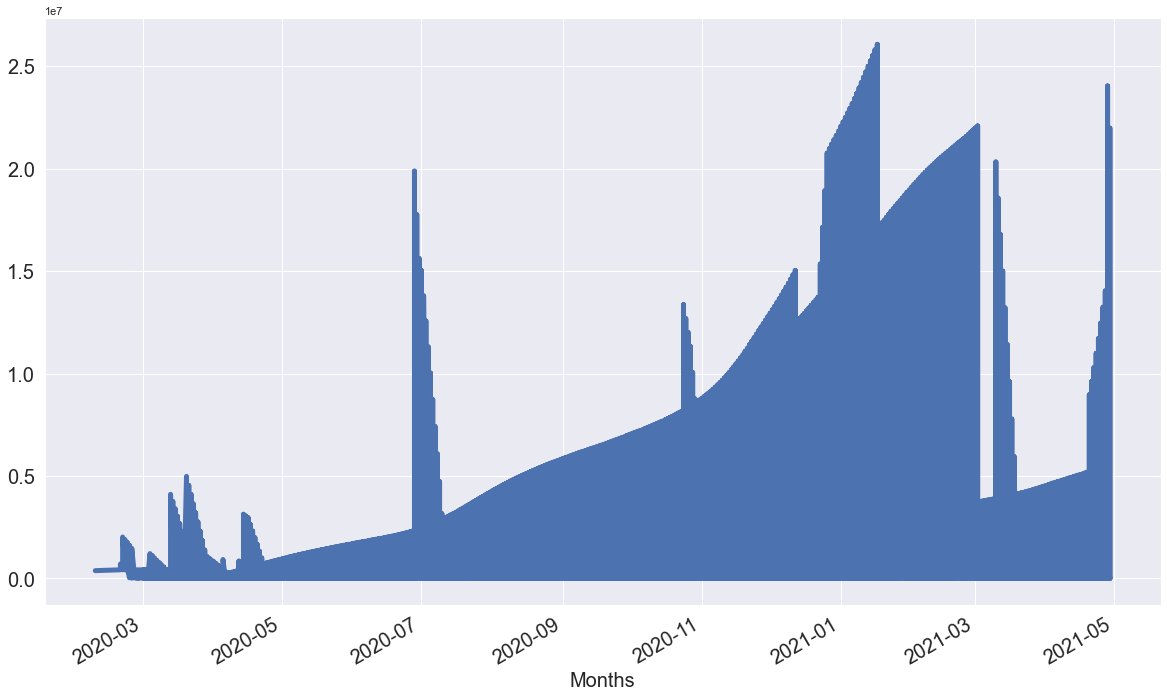

In [28]:
total_cases = covid_data.total_cases
total_cases.rolling(12).mean().plot(figsize=(20,12), linewidth=5, fontsize=20)
plt.xlabel('Months', fontsize=20)

Text(0.5, 0, 'Months')

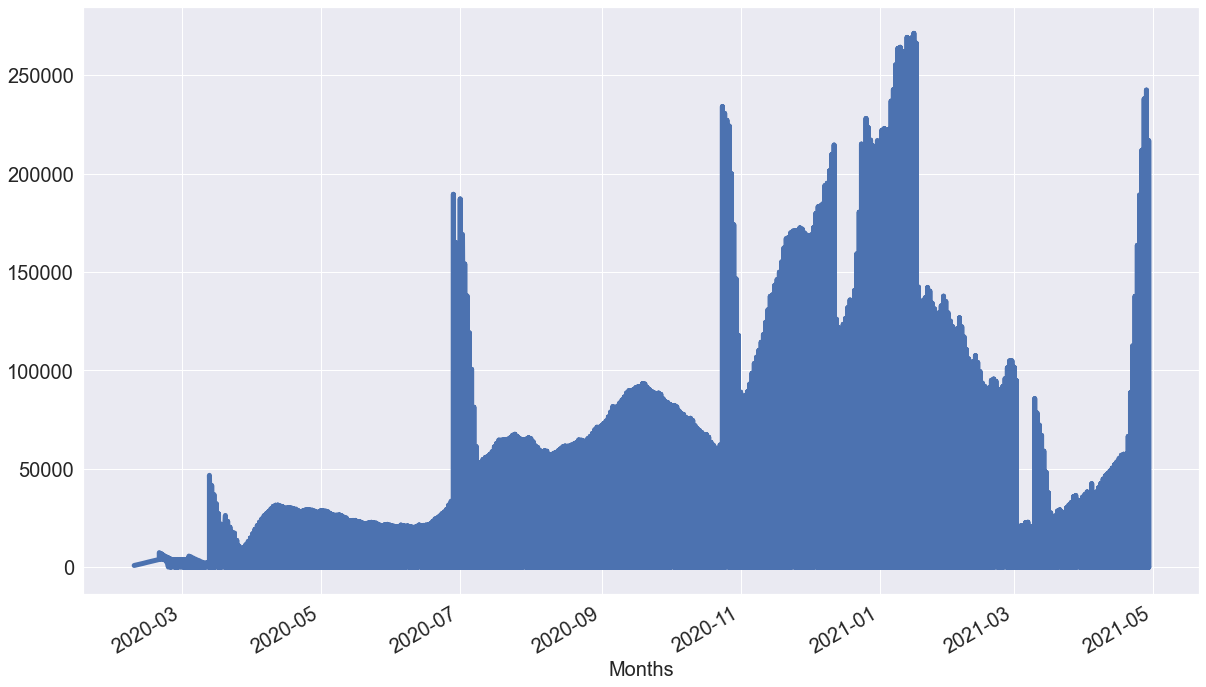

In [29]:
new_cases = covid_data.new_cases
new_cases.rolling(12).mean().plot(figsize=(20,12), linewidth=5, fontsize=20)
plt.xlabel('Months', fontsize=20)

Text(0.5, 0, 'Months')

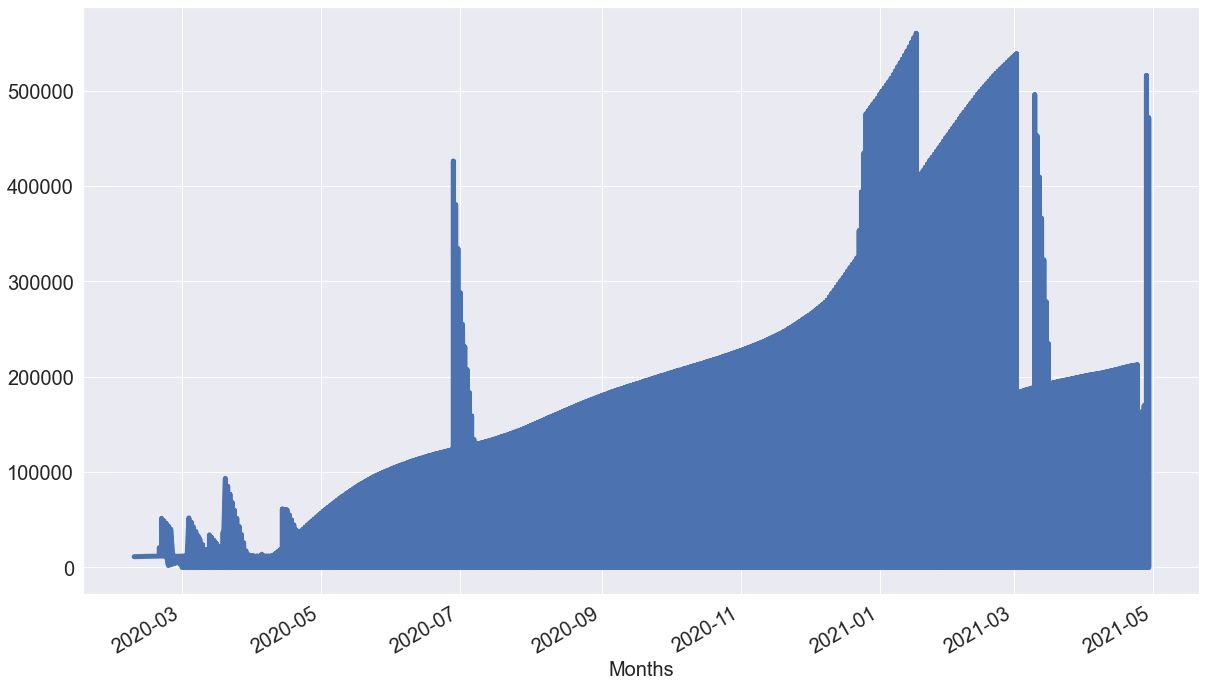

In [30]:
total_deaths = covid_data.total_deaths
total_deaths.rolling(12).mean().plot(figsize=(20,12), linewidth=5, fontsize=20)
plt.xlabel('Months', fontsize=20)

Text(0.5, 0, 'Months')

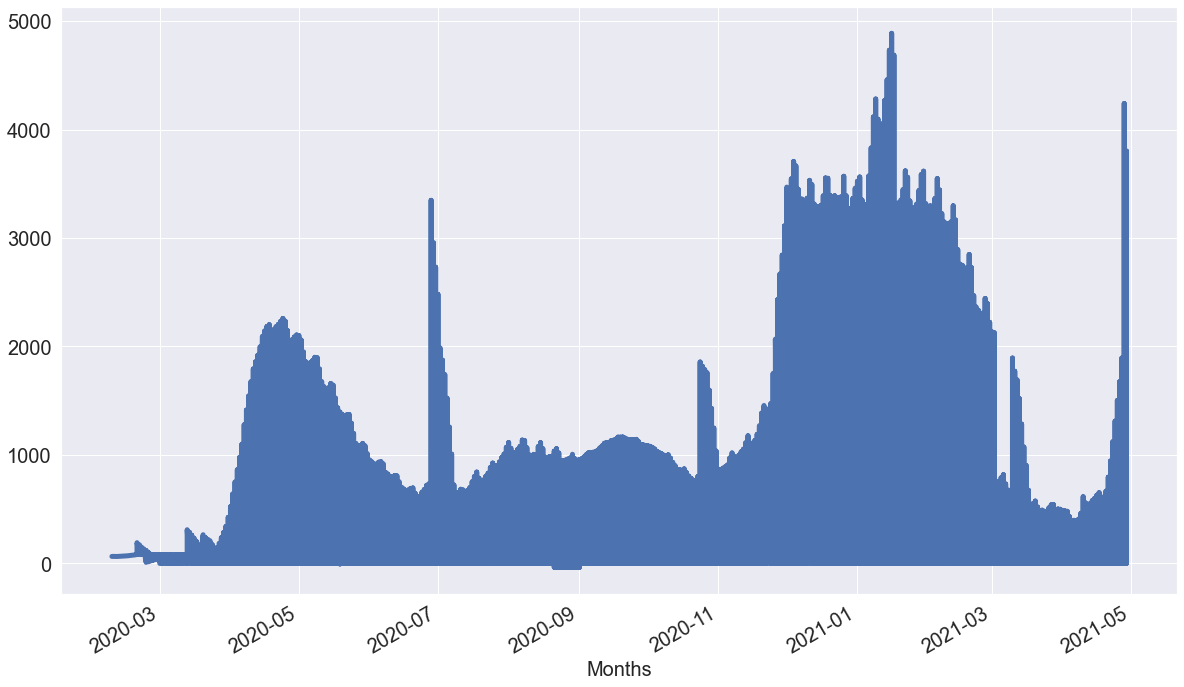

In [31]:
new_deaths = covid_data.new_deaths
new_deaths.rolling(12).mean().plot(figsize=(20,12), linewidth=5, fontsize=20)
plt.xlabel('Months', fontsize=20)

Text(0.5, 0, 'Months')

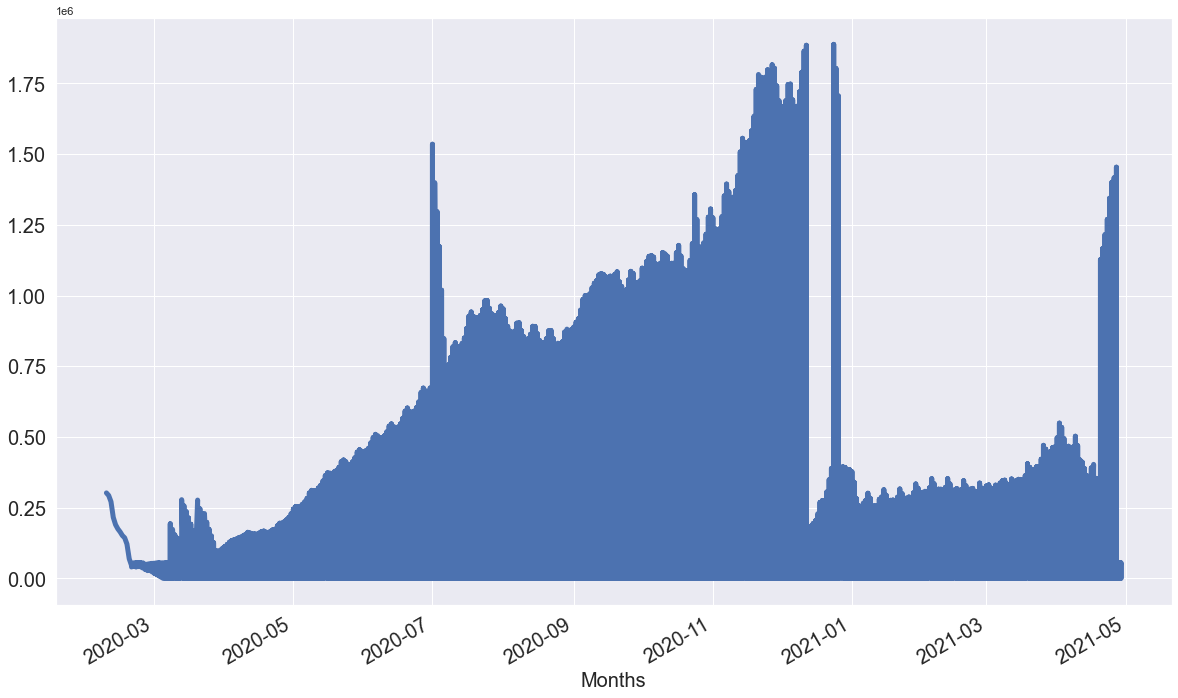

In [32]:
new_tests = covid_data.new_tests
new_tests.rolling(12).mean().plot(figsize=(20,12), linewidth=5, fontsize=20)
plt.xlabel('Months', fontsize=20)

Text(0.5, 0, 'Months')

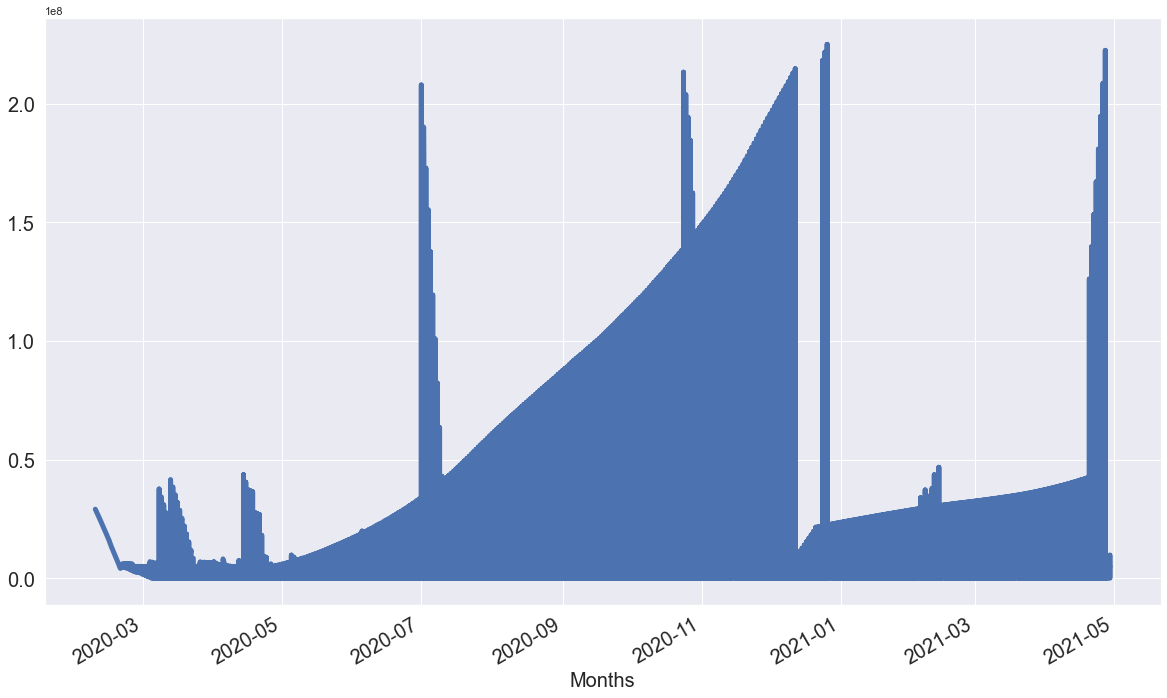

In [33]:
total_tests = covid_data.total_tests
total_tests.rolling(12).mean().plot(figsize=(20,12), linewidth=5, fontsize=20)
plt.xlabel('Months', fontsize=20)

Text(0.5, 0, 'Months')

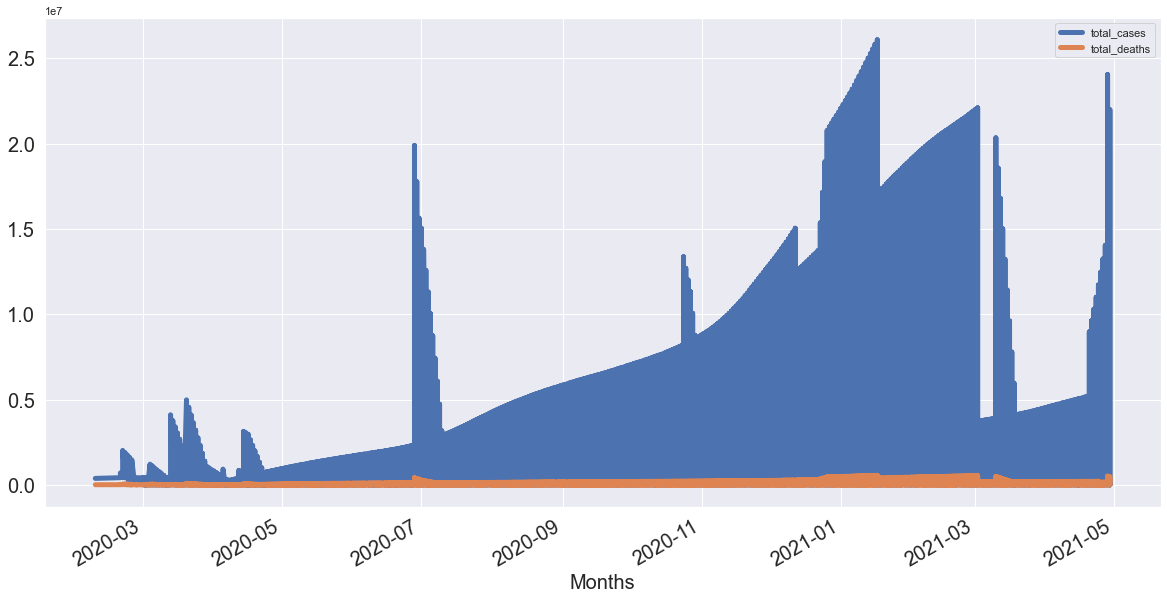

In [34]:
df_rm = pd.concat([total_cases.rolling(12).mean(), total_deaths.rolling(12).mean()],axis=1)
df_rm.plot(figsize = (20,10), linewidth = 5, fontsize = 20)
plt.xlabel('Months' , fontsize = 20)